In [204]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [205]:


GITHUB_CDN = "https://raw.githubusercontent.com/realamirhe/github-stargazer"
js_repo_urls = map(
    lambda idx: f"{GITHUB_CDN}/master/data/js-{idx}.csv",
    range(1, 10)
)

datas = pd.concat(list(map(pd.read_csv, js_repo_urls)))
datas = datas.select_dtypes(exclude=['object'])
datas = datas.drop(columns=['Unnamed: 0', 'score'], axis=1)
data1 = datas.reset_index()

data1.shape

(900, 25)

In [206]:


GITHUB_CDN = "https://raw.githubusercontent.com/realamirhe/github-stargazer"
js_repo_urls = map(
    lambda idx: f"{GITHUB_CDN}/master/data/py-{idx}.csv",
    range(1, 10)
)

datas = pd.concat(list(map(pd.read_csv, js_repo_urls)))
datas = datas.select_dtypes(exclude=['object'])
datas = datas.drop(columns=['Unnamed: 0', 'score'], axis=1)
data2 = datas.reset_index()

data2.shape

(900, 25)

In [207]:
GITHUB_CDN = "https://raw.githubusercontent.com/realamirhe/github-stargazer"
js_repo_urls = map(
    lambda idx: f"{GITHUB_CDN}/master/data/datas.csv",
    range(1, 10)
)

datas = pd.concat(list(map(pd.read_csv, js_repo_urls)))
datas = datas.select_dtypes(exclude=['object'])
datas = datas.drop(columns=['Unnamed: 0', 'score'], axis=1)
data3 = datas.reset_index()

data3.shape

(12303, 25)

In [208]:
GITHUB_CDN = "https://raw.githubusercontent.com/realamirhe/github-stargazer"
js_repo_urls = map(
    lambda idx: f"{GITHUB_CDN}/master/data/datas-2.csv",
    range(1, 10)
)

datas = pd.concat(list(map(pd.read_csv, js_repo_urls)))
datas = datas.select_dtypes(exclude=['object'])
datas = datas.drop(columns=['Unnamed: 0', 'score'], axis=1)
data4 = datas.reset_index()

data3.shape

(12303, 25)

In [209]:
data=pd.concat([data1,data2,data3,data4])
data.drop_duplicates(inplace=True)
data.shape

(3203, 25)

In [210]:

startruck_ranges = (-np.inf,2.5,np.inf)
startruck_labels = [0, 1]
y = data['stargazers_count']
y=np.log(y+0.001)
y = pd.cut(y, [i-1 for i in startruck_ranges], labels=startruck_labels)
y=y.astype(np.float64)
X = data.drop(columns=['stargazers_count', 'index', 'watchers', 'watchers_count'])
X = X.replace({ False: 0, True: 1 })
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 1664
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   private                      3203 non-null   int64
 1   owner.public_repos           3203 non-null   int64
 2   owner.public_gists           3203 non-null   int64
 3   owner.followers              3203 non-null   int64
 4   owner.following              3203 non-null   int64
 5   fork                         3203 non-null   int64
 6   forks                        3203 non-null   int64
 7   size                         3203 non-null   int64
 8   has_issues                   3203 non-null   int64
 9   has_projects                 3203 non-null   int64
 10  has_downloads                3203 non-null   int64
 11  has_wiki                     3203 non-null   int64
 12  has_pages                    3203 non-null   int64
 13  has_discussions              3203 non-null   int

In [211]:
pca=PCA(n_components=2)
pca.fit(X)
print(np.sum(pca.explained_variance_ratio_))
xp=pca.transform(X)
x_train, x_test, y_train, y_test = train_test_split(xp, y, test_size=0.2, random_state=42)

0.9998439005576631


Text(0.5, 1.0, '5-fold cross validation for KNN')

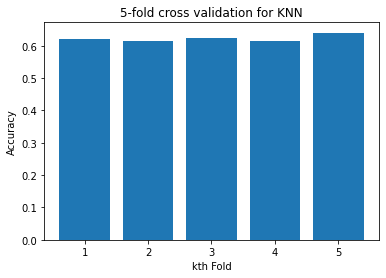

In [212]:
knn = KNeighborsClassifier()
knn=KNeighborsClassifier(n_neighbors=4)
acc=cross_val_score(knn, xp, y, cv=5)
plt.bar(np.arange(5)+1,acc)
plt.xlabel('kth Fold')
plt.ylabel('Accuracy')
plt.title('5-fold cross validation for KNN')

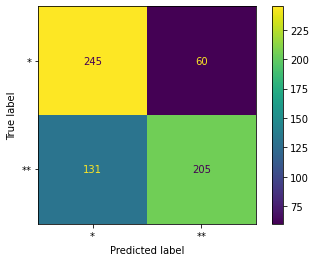

========================Classification Metrics======================
              precision    recall  f1-score   support

           0       0.65      0.80      0.72       305
           1       0.77      0.61      0.68       336

    accuracy                           0.70       641
   macro avg       0.71      0.71      0.70       641
weighted avg       0.72      0.70      0.70       641



In [213]:
clf=KNeighborsClassifier(n_neighbors=4)
clf.fit(x_train,y_train)
y_p=clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_p)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['*', '**'])
cm_display.plot()
plt.show()
print('========================Classification Metrics======================')
print(classification_report(y_test, y_p, labels=[0,1]))

Text(0.5, 1.0, '5-fold cross validation for SVM')

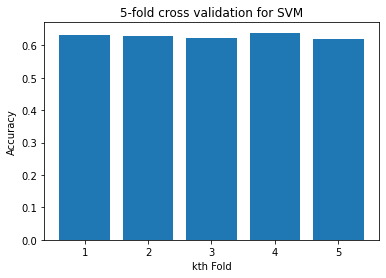

In [214]:
from sklearn.svm import SVC
clf=SVC(kernel='rbf',C=5,gamma='auto')
acc=cross_val_score(clf, xp, y, cv=5)
plt.bar(np.arange(5)+1,acc)
plt.xlabel('kth Fold')
plt.ylabel('Accuracy')
plt.title('5-fold cross validation for SVM')

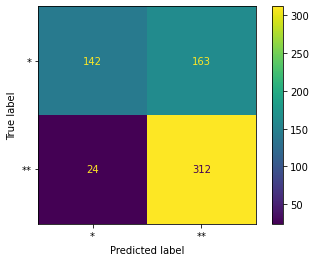

========================Classification Metrics======================
              precision    recall  f1-score   support

           0       0.86      0.47      0.60       305
           1       0.66      0.93      0.77       336

    accuracy                           0.71       641
   macro avg       0.76      0.70      0.69       641
weighted avg       0.75      0.71      0.69       641



In [215]:
clf=SVC(C=5,gamma='auto')
clf.fit(x_train,y_train)
y_p=clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_p)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['*', '**'])
cm_display.plot()
plt.show()
print('========================Classification Metrics======================')
print(classification_report(y_test, y_p, labels=[0,1]))

Text(0.5, 1.0, '5-fold cross validation for logestic regression')

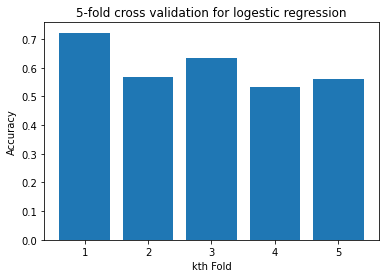

In [216]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000)
acc=cross_val_score(clf, xp, y, cv=5)
plt.bar(np.arange(5)+1,acc)
plt.xlabel('kth Fold')
plt.ylabel('Accuracy')
plt.title('5-fold cross validation for logestic regression')

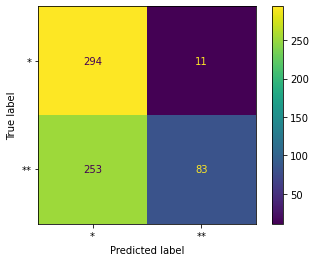

========================Classification Metrics======================
              precision    recall  f1-score   support

           0       0.54      0.96      0.69       305
           1       0.88      0.25      0.39       336

    accuracy                           0.59       641
   macro avg       0.71      0.61      0.54       641
weighted avg       0.72      0.59      0.53       641



In [217]:
clf = LogisticRegression(random_state=0,max_iter=1000)
clf.fit(x_train,y_train)
y_p=clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_p)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['*', '**'])
cm_display.plot()
plt.show()
print('========================Classification Metrics======================')
print(classification_report(y_test, y_p, labels=[0,1]))

Text(0.5, 1.0, '5-fold cross validation for Decision Tree')

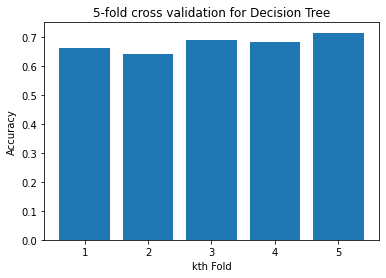

In [218]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=3)
acc=cross_val_score(clf, xp, y, cv=5)
plt.bar(np.arange(5)+1,acc)
plt.xlabel('kth Fold')
plt.ylabel('Accuracy')
plt.title('5-fold cross validation for Decision Tree')

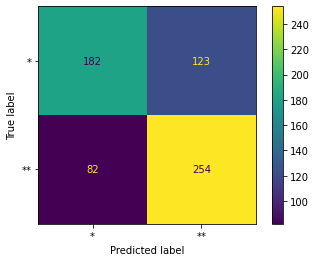

========================Classification Metrics======================
              precision    recall  f1-score   support

           0       0.69      0.60      0.64       305
           1       0.67      0.76      0.71       336

    accuracy                           0.68       641
   macro avg       0.68      0.68      0.68       641
weighted avg       0.68      0.68      0.68       641



In [219]:
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train)
y_p=clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_p)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['*', '**'])
cm_display.plot()
plt.show()
print('========================Classification Metrics======================')
print(classification_report(y_test, y_p, labels=[0,1]))

Text(0.5, 1.0, '5-fold cross validation for Random forest')

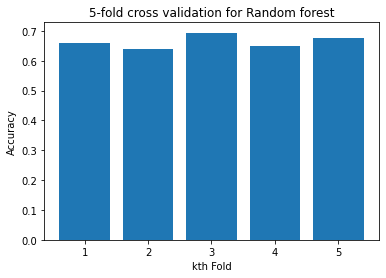

In [220]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,max_depth=3, random_state=0)
acc=cross_val_score(clf, xp, y, cv=5)
plt.bar(np.arange(5)+1,acc)
plt.xlabel('kth Fold')
plt.ylabel('Accuracy')
plt.title('5-fold cross validation for Random forest')

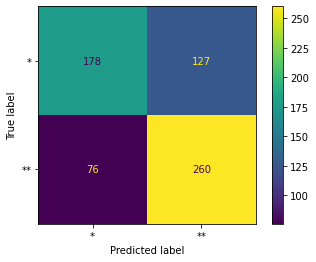

========================Classification Metrics======================
              precision    recall  f1-score   support

           0       0.70      0.58      0.64       305
           1       0.67      0.77      0.72       336

    accuracy                           0.68       641
   macro avg       0.69      0.68      0.68       641
weighted avg       0.69      0.68      0.68       641



In [221]:
clf = RandomForestClassifier(n_estimators=100,max_depth=3, random_state=0)
clf.fit(x_train,y_train)
y_p=clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_p)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['*', '**'])
cm_display.plot()
plt.show()
print('========================Classification Metrics======================')
print(classification_report(y_test, y_p, labels=[0,1]))

Text(0.5, 1.0, '5-fold cross validation for MLP')

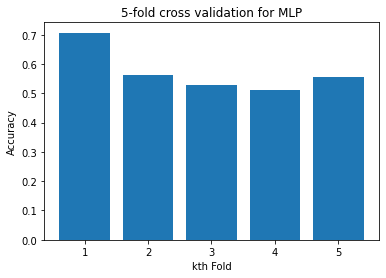

In [222]:
clf = MLPClassifier(hidden_layer_sizes=(50,10),random_state=1, max_iter=300)
acc=cross_val_score(clf, xp, y, cv=5)
plt.bar(np.arange(5)+1,acc)
plt.xlabel('kth Fold')
plt.ylabel('Accuracy')
plt.title('5-fold cross validation for MLP')

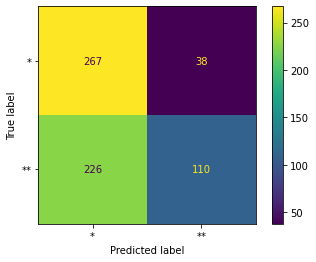

========================Classification Metrics======================
              precision    recall  f1-score   support

           0       0.54      0.88      0.67       305
           1       0.74      0.33      0.45       336

    accuracy                           0.59       641
   macro avg       0.64      0.60      0.56       641
weighted avg       0.65      0.59      0.56       641



In [223]:
clf = MLPClassifier(hidden_layer_sizes=(50,10),random_state=0, max_iter=300)
clf.fit(x_train,y_train)
y_p=clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_p)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['*', '**'])
cm_display.plot()
plt.show()
print('========================Classification Metrics======================')
print(classification_report(y_test, y_p, labels=[0,1]))

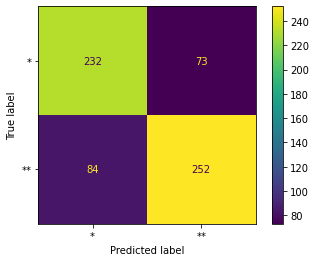

========================Classification Metrics======================
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       305
           1       0.78      0.75      0.76       336

    accuracy                           0.76       641
   macro avg       0.75      0.76      0.75       641
weighted avg       0.76      0.76      0.76       641



In [224]:
clf1=SVC(kernel='rbf',C=1,gamma='auto',probability=True)
clf2=LogisticRegression(random_state=0,max_iter=1000)
clf3=DecisionTreeClassifier(max_depth=3)
clf4=KNeighborsClassifier(n_neighbors=2)
clf4.fit(x_train,y_train)
clf3.fit(x_train,y_train)
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
yp1=clf1.predict_proba(x_test)
yp2=clf2.predict_proba(x_test)
yp3=clf3.predict_proba(x_test)
yp4=clf4.predict_proba(x_test)
y_p=np.argmax((yp1+yp2+yp3+yp4),axis=1)
confusion_matrix = metrics.confusion_matrix(y_test, y_p)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['*', '**'])
cm_display.plot()
plt.show()
print('========================Classification Metrics======================')
print(classification_report(y_test, y_p, labels=[0,1]))

Text(0.5, 1.0, '5-fold cross validation for AdaBoost')

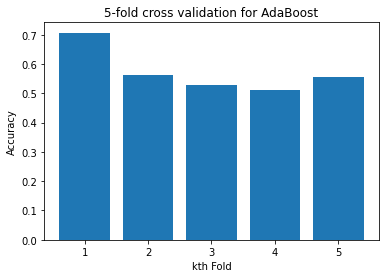

In [225]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=10)
plt.bar(np.arange(5)+1,acc)
plt.xlabel('kth Fold')
plt.ylabel('Accuracy')
plt.title('5-fold cross validation for AdaBoost')

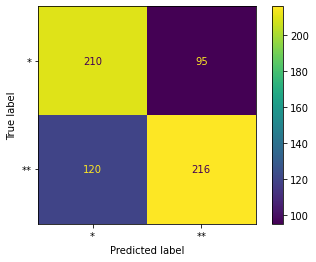

========================Classification Metrics======================
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       305
           1       0.69      0.64      0.67       336

    accuracy                           0.66       641
   macro avg       0.67      0.67      0.66       641
weighted avg       0.67      0.66      0.66       641



In [226]:
clf = AdaBoostClassifier(n_estimators=10)
clf.fit(x_train,y_train)
y_p=clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_p)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['*', '**'])
cm_display.plot()
plt.show()
print('========================Classification Metrics======================')
print(classification_report(y_test, y_p, labels=[0,1]))